## Dilemmas:
1. Maybe paragraph corpus, and not text (because the B1 articles have more than one, while B2-C1 articles have only one)
2. With regular news articles?

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import IFrame

import fetch_dw

import tqdm
fetch_dw.tqdm = tqdm.tqdm_notebook

plt.ion()

In [50]:
fetch_dw.LEVELS = ["A1", "A2", "B1", "B2", "C1", "C2"]
pages_df = fetch_dw.build_pages_df(300 , to_filter=False)

Retrieving all articles URLS...



Retrieving all the pages...


  1%|          | 3/300 [00:00<00:10, 27.04it/s]


Second Downloading for failed ones...
Extracting HTML...
Count of articles with full HTML...
True    300
Name: html, dtype: int64
Instantiating soup objects...


100%|██████████| 300/300 [00:19<00:00, 17.32it/s]


Enriching with LEKTIONEN pages...
Retrieving all the pages...


 20%|██        | 2/10 [00:00<00:00, 17.46it/s]


Second Downloading for failed ones...
Extracting HTML...
Count of articles with full HTML...
True    10
Name: html, dtype: int64
Instantiating soup objects...


100%|██████████| 10/10 [00:01<00:00,  5.35it/s]


Extracting artikel type...


  4%|▎         | 11/300 [00:00<00:02, 109.35it/s]

Extracting tags...


100%|██████████| 300/300 [00:00<00:00, 18519.53it/s]

Extracting levels...
Encoding level labels...
#pages = 300


## URL type (`av`)

In [51]:
url_types = pages_df["url"].apply(lambda s: s.split("/")[-1].split("-")[0])

In [52]:
url_types.value_counts()

a     273
av     17
l      10
Name: url, dtype: int64

In [53]:
pages_df[url_types == "av"]["artikel"].value_counts()

Top-Thema         8
Wort der Woche    3
Alltagsdeutsch    2
Radio D Teil 1    2
Sprachbar         2
Name: artikel, dtype: int64

In [54]:
pages_df = pages_df[url_types != "av"]

## Levels vs. Type of Article (`artikel`)

In [55]:
leveled_artikel_count = pages_df.groupby(["artikel", "levels"]).size()
leveled_artikel_count[leveled_artikel_count>5].dropna(how="all").fillna(0).sort_values()

artikel                          levels  
Top-Thema – Lektionen            (B1,)        6
Video-Thema – Podcast ohne UT    (B2, C1)    21
Alltagsdeutsch – Podcast         (C1, C2)    22
Wort der Woche                   (B2,)       25
Langsam gesprochene Nachrichten  (B2, C1)    31
Sprachbar                        (C1, C2)    39
Nachrichten                      (B2, C1)    42
Top-Thema – Podcast              (B1,)       54
dtype: int64

### TAKEN TO CORPUS

#### Top-Thema – Podcast - B1 [One Text]


In [56]:
page = pages_df[pages_df["artikel"] == "Top-Thema – Podcast"].iloc[0]
print(page["url"])
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

/de/vielfalt-als-stärke/a-2557463


#### Nachrichten - B2 & C1 - [Multiple Texts]

In [57]:
page = pages_df[pages_df["artikel"] == "Nachrichten"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

#### Langsam gesprochene Nachrichten - B2 & C1 [Multiple Texts]

In [58]:
page = pages_df[pages_df["artikel"] == "Langsam gesprochene Nachrichten"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

#### Top-Thema – Lektionen - B1 [One Text]

In [59]:
page = pages_df[pages_df["artikel"] == "Top-Thema – Lektionen"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

### NOT TAKEN TO CORPUS

#### Video-Thema – Lektionen - B2 & C1 [Dialogue]

In [60]:
page = pages_df[pages_df["artikel"] == "Video-Thema – Lektionen"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

#### Sprachbar - C1 & C2

In [61]:
page = pages_df[pages_df["artikel"] == "Sprachbar"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

#### Alltagsdeutsch – Podcast - C1 & C2 [No Text at all]

In [62]:
page = pages_df[pages_df["artikel"] == "Alltagsdeutsch – Podcast"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

#### Video-Thema – Podcast ohne UT - B2 & C1

In [63]:
page = pages_df[pages_df["artikel"] == "Video-Thema – Podcast ohne UT"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

#### Wort der Woche  - B2, B2 & C1

In [64]:
page = pages_df[pages_df["artikel"] == "Wort der Woche"].iloc[0]
#print(page["content"])
IFrame("http://dw.com" 
       + page["url"],
       width=1000, height=500)

## Load Full Text Dateframe

In [65]:
pages_df = pd.read_hdf('dw.h5', "pages_df")
text_df = pd.read_hdf('dw.h5', "text_df")
paragraphs_df = pd.read_hdf('dw.h5', "paragraphs_df")

## Text Corpus QA

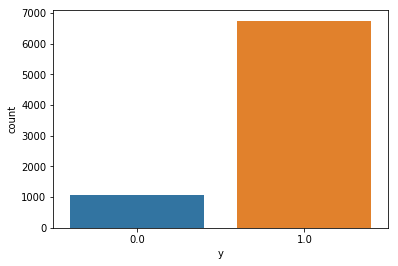

In [66]:
sns.countplot(text_df["y"])

In [67]:
text_df["wc"] = text_df["text"].apply(lambda x: len(x.split()))
text_df["pc"] = text_df["text"].apply(lambda x: len(x.split("\n")))

/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


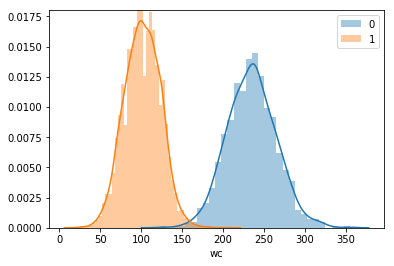

In [68]:
sns.distplot(text_df[text_df["y"] == 0]["wc"], label="0")
sns.distplot(text_df[text_df["y"] == 1]["wc"], label="1")
plt.legend()

In [69]:
text_df[text_df["y"] == 1]["pc"].describe(())

count    6753.0
mean        1.0
std         0.0
min         1.0
50%         1.0
max         1.0
Name: pc, dtype: float64

In [70]:
text_df[text_df["y"] == 0]["pc"].value_counts()

4     914
3     109
5      30
6       3
7       2
20      1
19      1
2       1
Name: pc, dtype: int64

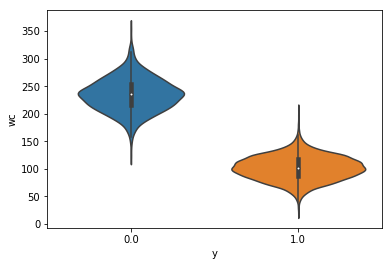

In [71]:
sns.violinplot(x="y", y ="wc", data=text_df)

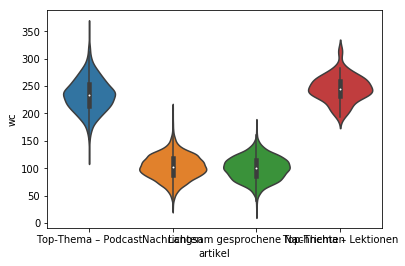

In [72]:
sns.violinplot(x="artikel", y ="wc", data=text_df)

In [73]:
(text_df["text"]
 .apply(lambda text: max(zip(map(len, text.split()), text.split())))).sort_values().tail()

5020       (33, Frauenfußball-Nationalmannschaft.)
2474       (33, Nicolaus-August-Otto-Berufsschule)
3162      (34, Leichtathletik-Weltmeisterschaften)
3259     (35, Einsatzgebiete/Auslandsbeziehungen")
4886    (36, Bundesausbildungsförderungsgesetzes,)
Name: text, dtype: object

https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests

/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution Flesch-Kincaid Grade per Text by Reading Lables')

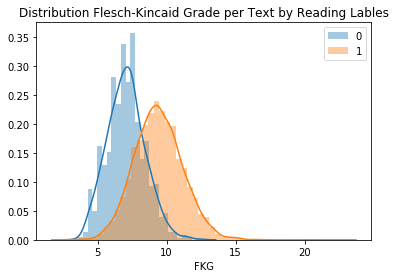

In [74]:
from textstat.textstat import textstat
text_df["FKG"] = text_df["text"].apply(textstat.flesch_kincaid_grade)

sns.distplot(text_df[text_df["y"] == 0]["FKG"], label="0")
sns.distplot(text_df[text_df["y"] == 1]["FKG"], label="1")

plt.legend()
plt.title("Distribution Flesch-Kincaid Grade per Text by Reading Lables")

## Parapgraphs Corpus Analysis

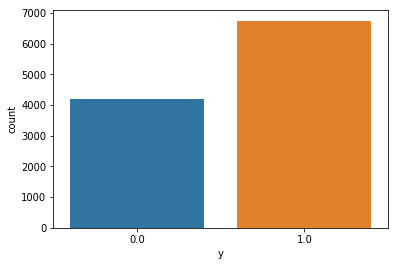

In [75]:
sns.countplot(paragraphs_df["y"])

In [76]:
paragraphs_df["wc"] = paragraphs_df["text"].apply(lambda x: len(x.split()))
paragraphs_df["pc"] = paragraphs_df["text"].apply(lambda x: len(x.split("\n")))

/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


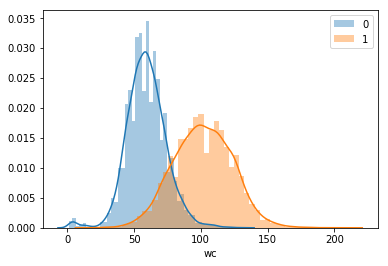

In [77]:
sns.distplot(paragraphs_df[paragraphs_df["y"] == 0]["wc"], label="0")
sns.distplot(paragraphs_df[paragraphs_df["y"] == 1]["wc"], label="1")
plt.legend()

In [78]:
paragraphs_df["pc"].value_counts()

1    10959
Name: pc, dtype: int64

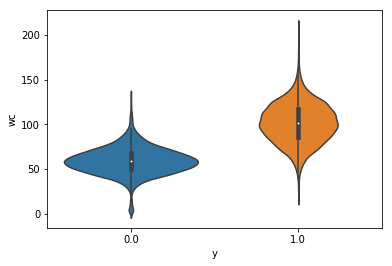

In [79]:
sns.violinplot(x="y", y ="wc", data=paragraphs_df)

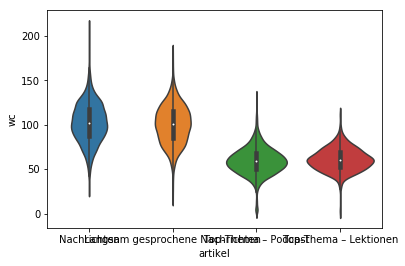

In [80]:
sns.violinplot(x="artikel", y ="wc", data=paragraphs_df)

/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/shlomi/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution Flesch-Kincaid Grade per Text by Reading Lables')

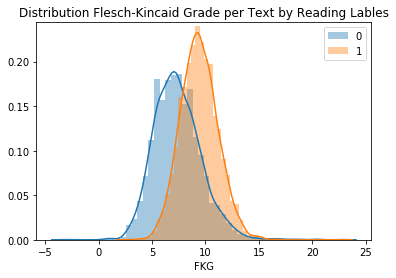

In [81]:
from textstat.textstat import textstat
paragraphs_df["FKG"] = paragraphs_df["text"].apply(textstat.flesch_kincaid_grade)

sns.distplot(paragraphs_df[paragraphs_df["y"] == 0]["FKG"], label="0")
sns.distplot(paragraphs_df[paragraphs_df["y"] == 1]["FKG"], label="1")

plt.legend()
plt.title("Distribution Flesch-Kincaid Grade per Text by Reading Lables")

## Corpus Labels Anlyasis 

## Text

### TF-IDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf_vectors = tf_vectorizer.fit_transform(text_df["text"])
tf_feature_names = tf_vectorizer.get_feature_names()

### t-SNF by Articles & `y`

In [83]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tf_vectors)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7814 samples in 0.014s...
[t-SNE] Computed neighbors for 7814 samples in 13.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7814
[t-SNE] Computed conditional probabilities for sample 2000 / 7814
[t-SNE] Computed conditional probabilities for sample 3000 / 7814
[t-SNE] Computed conditional probabilities for sample 4000 / 7814
[t-SNE] Computed conditional probabilities for sample 5000 / 7814
[t-SNE] Computed conditional probabilities for sample 6000 / 7814
[t-SNE] Computed conditional probabilities for sample 7000 / 7814
[t-SNE] Computed conditional probabilities for sample 7814 / 7814
[t-SNE] Mean sigma: 1.597506
[t-SNE] Computed conditional probabilities in 0.423s
[t-SNE] Iteration 50: error = 87.6746063, gradient norm = 0.0000512 (50 iterations in 23.333s)
[t-SNE] Iteration 100: error = 87.5214539, gradient norm = 0.0040421 (50 iterations in 25.183s)
[t-SNE] Iteration 150: error = 87.0276947, gradient norm

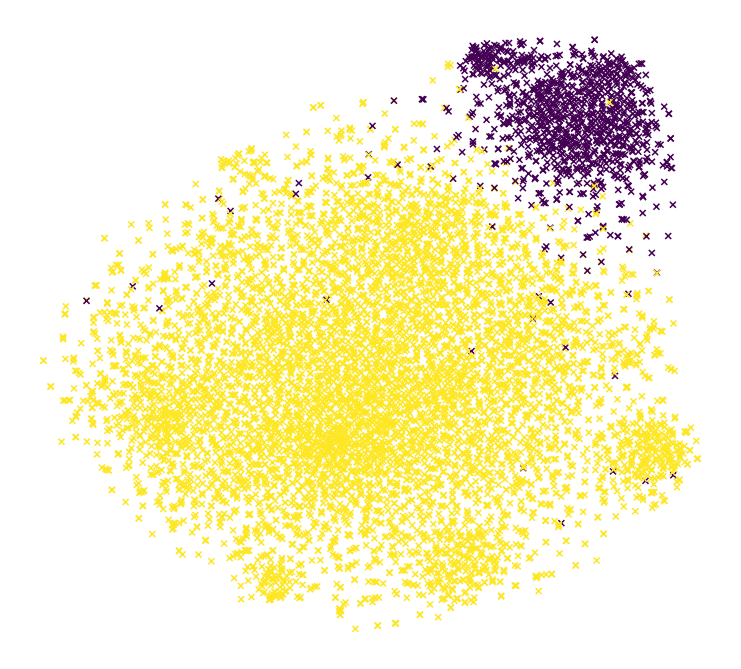

In [84]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=text_df["y"], marker="x")

### PCA

In [85]:
from sklearn.decomposition import PCA

X_embedded = PCA(n_components=2, random_state=0).fit_transform(tf_vectors.toarray())

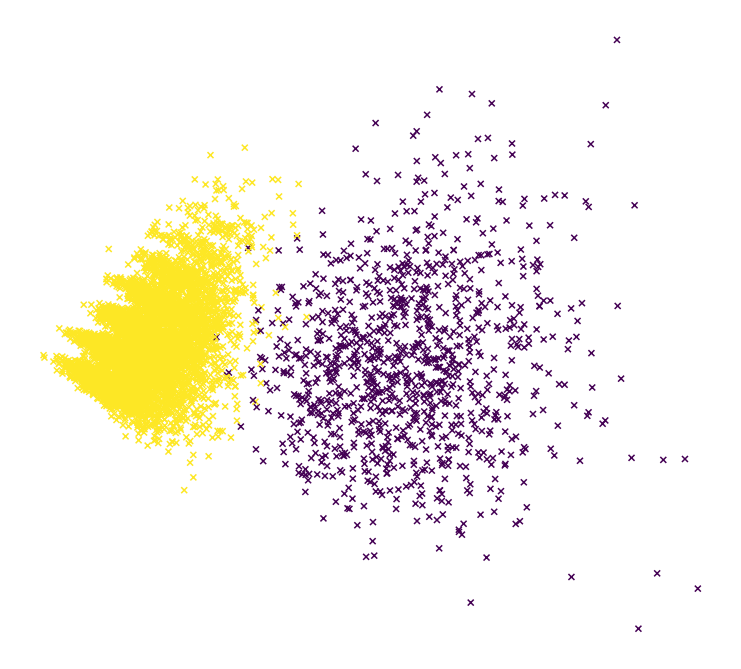

In [86]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=text_df["y"], marker="x")

### SVM

In [87]:
from sklearn.linear_model import SGDClassifier

text_clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=0)
text_clf_svm.fit(tf_vectors.toarray(), text_df["y"].as_matrix())
predicted_svm = text_clf_svm.predict(tf_vectors.toarray())
np.mean(predicted_svm == text_df["y"])


/Users/shlomi/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.9993601228564115

## Paragraphs

In [ ]:
# Paragraph embedding - vis
# can we find pre-trained embedding?

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf_vectors = tf_vectorizer.fit_transform(paragraphs_df["text"])
tf_feature_names = tf_vectorizer.get_feature_names()

In [89]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD


X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(tf_vectors)
X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10959 samples in 0.021s...
[t-SNE] Computed neighbors for 10959 samples in 20.140s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10959
[t-SNE] Computed conditional probabilities for sample 2000 / 10959
[t-SNE] Computed conditional probabilities for sample 3000 / 10959
[t-SNE] Computed conditional probabilities for sample 4000 / 10959
[t-SNE] Computed conditional probabilities for sample 5000 / 10959
[t-SNE] Computed conditional probabilities for sample 6000 / 10959
[t-SNE] Computed conditional probabilities for sample 7000 / 10959
[t-SNE] Computed conditional probabilities for sample 8000 / 10959
[t-SNE] Computed conditional probabilities for sample 9000 / 10959
[t-SNE] Computed conditional probabilities for sample 10000 / 10959
[t-SNE] Computed conditional probabilities for sample 10959 / 10959
[t-SNE] Mean sigma: 1.472687
[t-SNE] Computed conditional probabilities in 0.558s
[t-SNE] Iteration 50: error = 91.5

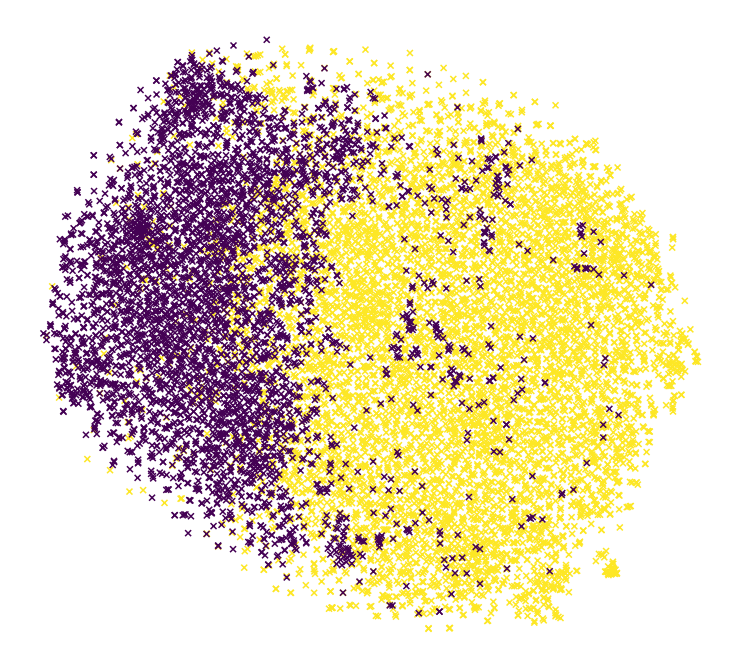

In [90]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=paragraphs_df["y"], marker="x")

### PCA

In [91]:
X_embedded = PCA(n_components=2, random_state=0).fit_transform(tf_vectors.toarray())

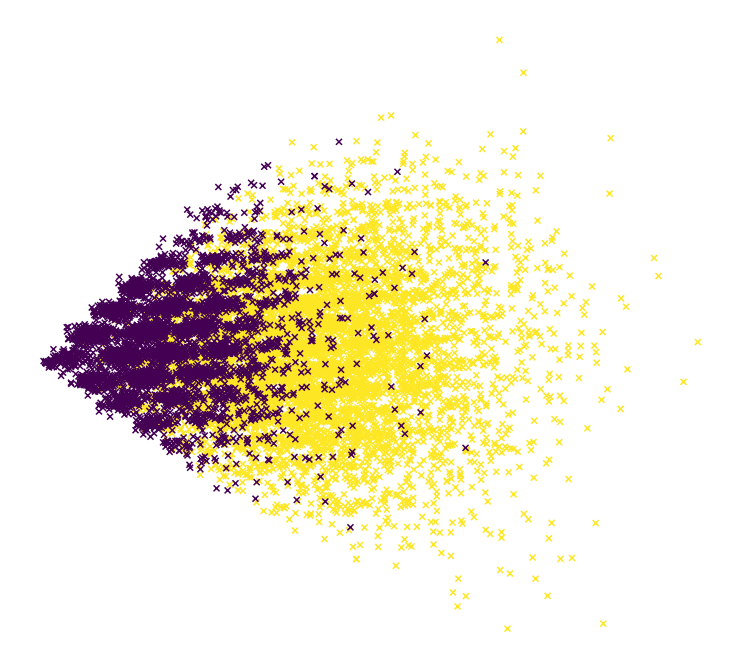

In [92]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(frameon=False)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
        c=paragraphs_df["y"], marker="x")

In [93]:
from sklearn.linear_model import SGDClassifier

text_clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=0)
text_clf_svm.fit(tf_vectors.toarray(), paragraphs_df["y"].as_matrix())
predicted_svm = text_clf_svm.predict(tf_vectors.toarray())
np.mean(predicted_svm == paragraphs_df["y"])


/Users/shlomi/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.9766402043982115

## LDA

In [94]:
from sklearn.decomposition import LatentDirichletAllocation

no_features = 1000
no_topics = 20
no_top_words = 10

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
print("Preparing Data...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(text_df["text"])
tf_feature_names = tf_vectorizer.get_feature_names()

# Run LDA
print("Running LDA...")
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, verbose=True).fit(tf)
print("Done!")

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tf_feature_names, no_top_words)

Preparing Data...
Running LDA...


/Users/shlomi/miniconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


iteration: 1 of max_iter: 5
iteration: 2 of max_iter: 5
iteration: 3 of max_iter: 5
iteration: 4 of max_iter: 5
iteration: 5 of max_iter: 5
Done!
Topic 0:
und von den im syrien zu auf nach staat aus
Topic 1:
von sie es und ist für eine den hat dazu
Topic 2:
jahr journalisten nachdem kämpfen lager allein essen sogenannte sicherheitskräfte zwölf
Topic 3:
sie und es ist das nicht sind für auch zu
Topic 4:
al saudi iran rebellen arabien jemen arabischen im vereinigten bin
Topic 5:
und das ist den nicht er zu für es ein
Topic 6:
grund regierungschef schwer kerry affäre heimat soldaten deutschland protesten wolle
Topic 7:
und für von merkel deutschland den eine das spd zu
Topic 8:
prozent mit bei partei den im auf von als und
Topic 9:
den und des zu gegen von er dem habe hatte
Topic 10:
und von nach auf menschen dem im worden den mit
Topic 11:
russland ukraine russischen russische putin moskau waffenruhe wladimir separatisten russlands
Topic 12:
von das im den und für des mit millionen als
T